### Building Simple Forecasting Models for sales

In this exercise, we will build a series of forecasting model for sales data and compare them.  
The data are contained in a csv file.  
Weekly sales and the week number of the observation period are provided. 

In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
data = pd.read_csv('sales_data.csv')

data.head()

,Weekly Demand,Month,Week
0,508,Jan-08,1
1,498,Jan-08,2
2,528,Jan-08,3
3,538,Jan-08,4
4,539,Jan-08,5


We will use the 2008 sales data (the first 105 records) to train the model and use it to forcast the 2009 sales

In [3]:
idx_last_training_sample = 105

### Model 1: Linear Trend

In [4]:
training_data = data.iloc[:idx_last_training_sample]
training_data.tail()

,Weekly Demand,Month,Week
100,767,Dec-09,101
101,784,Dec-09,102
102,863,Dec-09,103
103,827,Dec-09,104
104,730,Dec-09,105


In [5]:
X = training_data[['Week']]
y = training_data[['Weekly Demand']]

In [6]:
lr = LinearRegression(n_jobs=-1)

lr_fitted = lr.fit(X, y)

In [7]:
data['Linear trend'] = lr_fitted.predict(data[['Week']])

In [8]:
data.head()

,Weekly Demand,Month,Week,Linear trend
0,508,Jan-08,1,565.837376
1,498,Jan-08,2,569.486475
2,528,Jan-08,3,573.135573
3,538,Jan-08,4,576.784671
4,539,Jan-08,5,580.433769


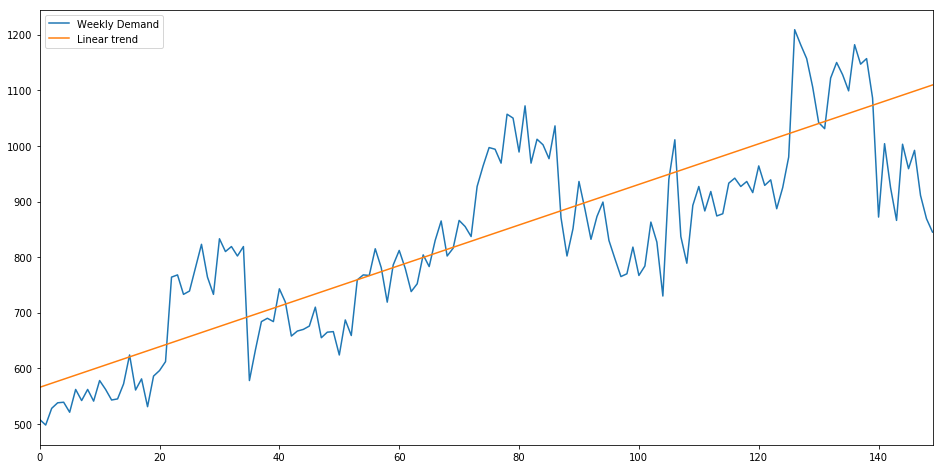

In [9]:
data[['Weekly Demand', 'Linear trend']].plot(figsize=(16,8))

### Model 2: Log-linear Trend
As an alternative to the linear trend, we will instead include a log-linear trend.

We have calculated ln(week number) so that we may consider a non-linear trend.

In [10]:
import numpy as np

In [11]:
data['ln(week)'] = data['Week'].apply(np.log)

In [12]:
data

,Weekly Demand,Month,Week,Linear trend,ln(week)
0,508,Jan-08,1,565.837376,0.000000
1,498,Jan-08,2,569.486475,0.693147
2,528,Jan-08,3,573.135573,1.098612
3,538,Jan-08,4,576.784671,1.386294
4,539,Jan-08,5,580.433769,1.609438
5,521,Feb-08,6,584.082867,1.791759
6,562,Feb-08,7,587.731965,1.945910
7,542,Feb-08,8,591.381063,2.079442
8,562,Feb-08,9,595.030161,2.197225
9,541,Mar-08,10,598.679259,2.302585


In [13]:
training_data = data.iloc[:idx_last_training_sample]
training_data.tail()

,Weekly Demand,Month,Week,Linear trend,ln(week)
100,767,Dec-09,101,930.747184,4.615121
101,784,Dec-09,102,934.396282,4.624973
102,863,Dec-09,103,938.045380,4.634729
103,827,Dec-09,104,941.694478,4.644391
104,730,Dec-09,105,945.343576,4.653960


In [14]:
X = training_data[['ln(week)']]
y = training_data[['Weekly Demand']]

In [15]:
lr = LinearRegression(n_jobs=-1)

lr_fitted = lr.fit(X, y)

In [16]:
data['LogLinear'] = lr_fitted.predict(data[['ln(week)']])

In [17]:
data.head()

,Weekly Demand,Month,Week,Linear trend,ln(week),LogLinear
0,508,Jan-08,1,565.837376,0.000000,319.121484
1,498,Jan-08,2,569.486475,0.693147,401.223787
2,528,Jan-08,3,573.135573,1.098612,449.250555
3,538,Jan-08,4,576.784671,1.386294,483.326090
4,539,Jan-08,5,580.433769,1.609438,509.757128


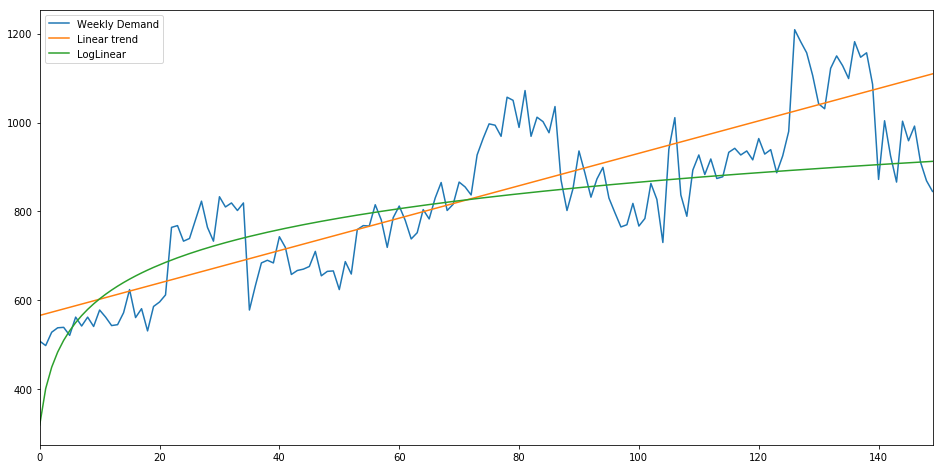

In [18]:
data[['Weekly Demand', 'Linear trend', 'LogLinear']].plot(figsize=(16,8))

### Model 3: Linear Trend with Monthly Dummy Variables


Monthly dummy variables will be created, which we will use to account for seasonality if it necessary.  
Note that there are dummy variables for February through December.  
We do not include a dummy variable for January, as doing so would result in multicollinearity.  
The interpretation of the dummy variables’ coefficients is the difference compared to January sales, holding all other variables constant.

In [19]:
data_months = pd.concat([data,
                   pd.get_dummies(data.Month.str[:3], columns=['Month']).drop('Jan', axis=1)],
                  axis=1)

In [20]:
training_data = data_months.iloc[:idx_last_training_sample]
training_data.tail()

,Weekly Demand,Month,Week,Linear trend,ln(week),LogLinear,Apr,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
100,767,Dec-09,101,930.747184,4.615121,865.775982,0,0,1,0,0,0,0,0,0,0,0
101,784,Dec-09,102,934.396282,4.624973,866.942972,0,0,1,0,0,0,0,0,0,0,0
102,863,Dec-09,103,938.045380,4.634729,868.098577,0,0,1,0,0,0,0,0,0,0,0
103,827,Dec-09,104,941.694478,4.644391,869.243017,0,0,1,0,0,0,0,0,0,0,0
104,730,Dec-09,105,945.343576,4.653960,870.376505,0,0,1,0,0,0,0,0,0,0,0


In [21]:
features = ['Week','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
X = training_data[features]
y = training_data[['Weekly Demand']]

In [22]:
lr = LinearRegression(n_jobs=-1)

lr_fitted = lr.fit(X, y)

In [23]:
data_months['LinearMonth'] = lr_fitted.predict(data_months[features])

In [24]:
data_months.head()

,Weekly Demand,Month,Week,Linear trend,ln(week),LogLinear,Apr,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep,LinearMonth
0,508,Jan-08,1,565.837376,0.000000,319.121484,0,0,0,0,0,0,0,0,0,0,0,533.037633
1,498,Jan-08,2,569.486475,0.693147,401.223787,0,0,0,0,0,0,0,0,0,0,0,537.084393
2,528,Jan-08,3,573.135573,1.098612,449.250555,0,0,0,0,0,0,0,0,0,0,0,541.131153
3,538,Jan-08,4,576.784671,1.386294,483.326090,0,0,0,0,0,0,0,0,0,0,0,545.177913
4,539,Jan-08,5,580.433769,1.609438,509.757128,0,0,0,0,0,0,0,0,0,0,0,549.224673


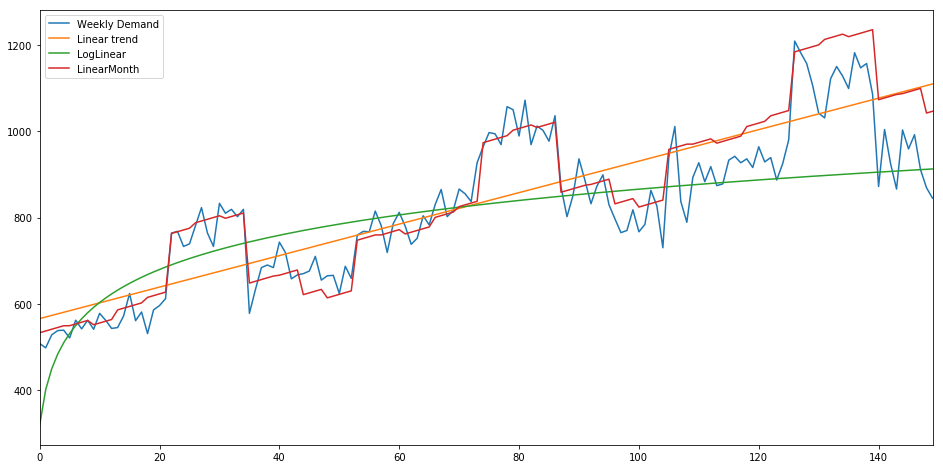

In [25]:
data_months[['Weekly Demand', 'Linear trend', 'LogLinear','LinearMonth']].plot(figsize=(16,8))

### Model 4: Log-linear Trend with Monthly Dummy Variables

In [26]:
data_months.head()

,Weekly Demand,Month,Week,Linear trend,ln(week),LogLinear,Apr,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep,LinearMonth
0,508,Jan-08,1,565.837376,0.000000,319.121484,0,0,0,0,0,0,0,0,0,0,0,533.037633
1,498,Jan-08,2,569.486475,0.693147,401.223787,0,0,0,0,0,0,0,0,0,0,0,537.084393
2,528,Jan-08,3,573.135573,1.098612,449.250555,0,0,0,0,0,0,0,0,0,0,0,541.131153
3,538,Jan-08,4,576.784671,1.386294,483.326090,0,0,0,0,0,0,0,0,0,0,0,545.177913
4,539,Jan-08,5,580.433769,1.609438,509.757128,0,0,0,0,0,0,0,0,0,0,0,549.224673


In [27]:
features = ['ln(week)','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
X = training_data[features]
y = training_data[['Weekly Demand']]

In [28]:
lr = LinearRegression(n_jobs=-1)

lr_fitted = lr.fit(X, y)

In [29]:
data_months['LogLinearMonth'] = lr_fitted.predict(data_months[features])

In [30]:
data_months.head()

,Weekly Demand,Month,Week,Linear trend,ln(week),LogLinear,Apr,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep,LinearMonth,LogLinearMonth
0,508,Jan-08,1,565.837376,0.000000,319.121484,0,0,0,0,0,0,0,0,0,0,0,533.037633,327.216464
1,498,Jan-08,2,569.486475,0.693147,401.223787,0,0,0,0,0,0,0,0,0,0,0,537.084393,419.461802
2,528,Jan-08,3,573.135573,1.098612,449.250555,0,0,0,0,0,0,0,0,0,0,0,541.131153,473.421866
3,538,Jan-08,4,576.784671,1.386294,483.326090,0,0,0,0,0,0,0,0,0,0,0,545.177913,511.707141
4,539,Jan-08,5,580.433769,1.609438,509.757128,0,0,0,0,0,0,0,0,0,0,0,549.224673,541.403507


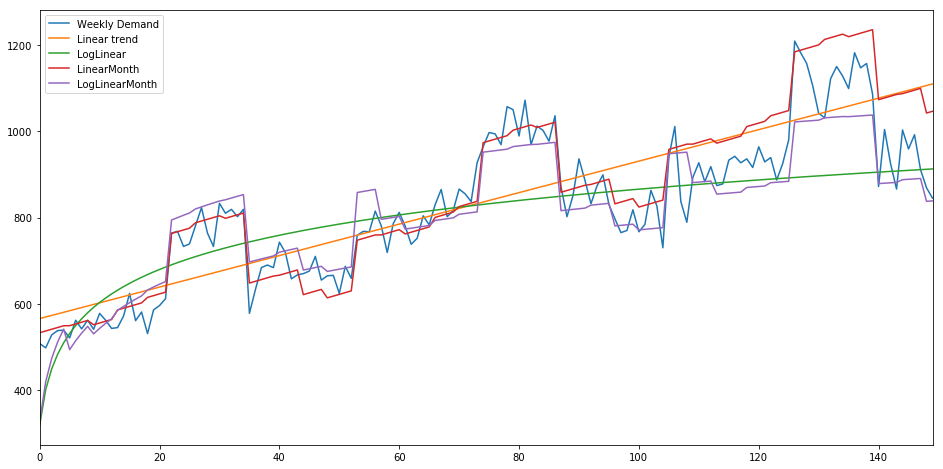

In [31]:
data_months[['Weekly Demand', 'Linear trend', 'LogLinear','LinearMonth','LogLinearMonth']].plot(figsize=(16,8))

### Evaluating Performance
To summarize the performance, we will calculate the mean absolute error (MAE) during the forecasting period.

In [32]:
abs_error1 = (data_months['Linear trend']-data_months['Weekly Demand']).abs()
print('Model 1')
print('training mean absolute error (MAE): {}'.format(abs_error1[:idx_last_training_sample].mean()))
print('forcasting mean absolute error (MAE): {}'.format(abs_error1[idx_last_training_sample:].mean()))

abs_error2 = (data_months['LogLinear']-data_months['Weekly Demand']).abs()
print('Model 2')
print('training mean absolute error (MAE): {}'.format(abs_error2[:idx_last_training_sample].mean()))
print('forcasting mean absolute error (MAE): {}'.format(abs_error2[idx_last_training_sample:].mean()))

abs_error3 = (data_months['LinearMonth']-data_months['Weekly Demand']).abs()
print('Model 3')
print('training mean absolute error (MAE): {}'.format(abs_error3[:idx_last_training_sample].mean()))
print('forcasting mean absolute error (MAE): {}'.format(abs_error3[idx_last_training_sample:].mean()))

abs_error4 = (data_months['LogLinearMonth']-data_months['Weekly Demand']).abs()
print('Model 4')
print('training mean absolute error (MAE): {}'.format(abs_error4[:idx_last_training_sample].mean()))
print('forcasting mean absolute error (MAE): {}'.format(abs_error4[idx_last_training_sample:].mean()))

Model 1
training mean absolute error (MAE): 73.7346679436
forcasting mean absolute error (MAE): 97.825154161
Model 2
training mean absolute error (MAE): 75.3319008879
forcasting mean absolute error (MAE): 104.841766641
Model 3
training mean absolute error (MAE): 30.4088683552
forcasting mean absolute error (MAE): 100.572171049
Model 4
training mean absolute error (MAE): 40.3719112873
forcasting mean absolute error (MAE): 68.350904811


### Based on the analysis, the __Log-Linear with dummy months vars__ forecasting model would perform better.